In [27]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("chanchito-feliz").getOrCreate()
spark

In [38]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#leer el archivo

app = spark.read.csv(path        = '/Users/franca/Documents/GitHub/ETL-con-pyspark/input_data/googleplaystore.csv',
                         inferSchema = True, header = True)
app.show(5, truncate = True)

ConnectionRefusedError: [Errno 61] Connection refused

In [36]:
df = app.toPandas()
df['Reviews'].unique()

ConnectionRefusedError: [Errno 61] Connection refused

In [22]:
app.limit(50).toPandas()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
#explorar el df
app.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



In [6]:
#numero de filas
app.count()


10841

In [7]:
#numero de columnas
len(app.columns)

13

In [8]:
#contar valores nulos de cada columna

nulos = app.select([sum(col(c).isNull().cast("int")).alias(c) for c in app.columns])
nulos.show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|     0|      0|   0|       0|   0|    0|             1|     0|           0|          1|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+




app.columns: Esta expresión accede a la lista de todas las columnas del DataFrame.

for c in app.columns: Recorremos cada columna del DataFrame con el nombre c, en un loop para aplicar la lógica a cada una.

col(c): Usamos la función col() para referirnos a cada columna por su nombre c.
isNull(): Esta función verifica si el valor de cada fila en la columna es nulo. Devuelve True si es nulo, y False si no lo es.

cast("int"): Dado que True y False no son numéricos, necesitamos convertirlos en enteros. Al hacer el cast("int"), se convierte True en 1 y False en 0. Así, podemos contar los nulos al sumar los valores 1.

sum(): Se utiliza para sumar los valores de 1 generados por los nulos en cada columna.

alias(c): Le damos un alias al resultado de la suma, que será el nombre de la columna original c. Esto sirve para que el resultado final tenga el nombre de cada columna.

In [9]:
#cantidad de duplicados por cada columna 

#contar numero total de filas 

total_filas = app.count()

#lsta para almacenar las columnas que tienen duplicaods 

columnas_con_duplicados = []

#verificar duplicados en cada columna 

for c in app.columns:
    #contar valores unicos en cada columna
    unicos = app.select(c).distinct().count()
    
    #si el numero de valores unicos es menor que el total de filas, hay duplicados en esa columna
    if unicos < total_filas:
        columnas_con_duplicados.append(c)
        
#mostrar columnas duplicadas

print(f"Las columnas con duplicados son: {', '.join(columnas_con_duplicados)}")


Las columnas con duplicados son: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver


In [10]:
# Contar valores únicos por columna
for columna in app.columns:
    unicos = app.select(columna).distinct().count()
    print(f"Valores únicos en {columna}: {unicos}")

Valores únicos en App: 9660
Valores únicos en Category: 36
Valores únicos en Rating: 43
Valores únicos en Reviews: 6002
Valores únicos en Size: 464
Valores únicos en Installs: 24
Valores únicos en Type: 6
Valores únicos en Price: 95
Valores únicos en Content Rating: 9
Valores únicos en Genres: 121
Valores únicos en Last Updated: 1379
Valores únicos en Current Ver: 2836
Valores únicos en Android Ver: 37


In [11]:
#Eliminar columnas que se que no voy a usar

eliminar_columnas = app.drop('Current Ver', 'Android Ver')

In [25]:
eliminar_columnas.limit(20).toPandas()

24/10/23 12:43:35 ERROR Executor: Exception in task 0.0 in stage 180.0 (TID 99)
org.apache.spark.SparkFileNotFoundException: File file:/Users/franca/Documents/GitHub/ETL-con-pyspark/input data/googleplaystore.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:781)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.s

Py4JJavaError: An error occurred while calling o301.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 180.0 failed 1 times, most recent failure: Lost task 0.0 in stage 180.0 (TID 99) (192.168.18.36 executor driver): org.apache.spark.SparkFileNotFoundException: File file:/Users/franca/Documents/GitHub/ETL-con-pyspark/input data/googleplaystore.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:781)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4149)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4146)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: org.apache.spark.SparkFileNotFoundException: File file:/Users/franca/Documents/GitHub/ETL-con-pyspark/input data/googleplaystore.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:781)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [16]:
#corregir types de las columnas

data_schema = list((StructField("App"     ,      StringType(), True),
                    StructField("Category",      StringType(), True),
                    StructField("Rating"  ,      IntegerType(), True),
                    StructField("Reviews" ,      IntegerType(), True),
                    StructField("Size" ,         IntegerType(), True),
                    StructField("Installs",      IntegerType(), True),
                    StructField("Type"    ,      StringType(), True),
                    StructField("Price"   ,      IntegerType(), True),
                    StructField("Content Rating" ,      StringType(), True),
                    StructField("Genres"  ,      StringType(), True),
                    StructField("Last Updated" , DateType(), True)))

final_struc = StructType(fields = data_schema)


In [18]:
app = spark.read.csv(path        = '/Users/franca/Documents/GitHub/ETL-con-pyspark/input data/googleplaystore.csv',
                                 schema = final_struc)

app.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: integer (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Size: integer (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Content: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: date (nullable = true)



In [19]:
# Contar el número total de filas antes de eliminar duplicados
total_filas_antes = app.count()

#eliminar duplicados

app_sin_duplicados = app.dropDuplicates()

# Contar el número de filas después de eliminar duplicados
total_filas_despues = app_sin_duplicados.count()

# Mostrar la diferencia
if total_filas_antes > total_filas_despues:
    print(f"Duplicados eliminados. Filas antes: {total_filas_antes}, Filas después: {total_filas_despues}")
else:
    print("No se encontraron duplicados para eliminar.")

Duplicados eliminados. Filas antes: 10842, Filas después: 10357


In [20]:
df_pandas = app.toPandas()


for columna in df_pandas.columns:
    print(f"Valores únicos en la columna '{columna}':")
    print(df_pandas[columna].unique())
    print("-" * 50)

Valores únicos en la columna 'App':
['App' 'Photo Editor & Candy Camera & Grid & ScrapBook'
 'Coloring book moana' ... 'Parkinson Exercices FR'
 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
Valores únicos en la columna 'Category':
['Category' 'ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY'
 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING'
 'EDUCATION' 'ENTERTAINMENT' 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK'
 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE'
 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL' 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS'
 'TRAVEL_AND_LOCAL' 'TOOLS' 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING'
 'WEATHER' 'VIDEO_PLAYERS' 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION'
 ' traffic jams' 'Face' '1.9']
--------------------------------------------------
Valores únicos en la columna 'Rating':
[nan 19.]
--------------------------------------------------
Valores únicos en la co

In [22]:
df_pandas.isna().sum()

App                 0
Category            0
Rating          10841
Reviews             4
Size            10842
Installs        10841
Type                0
Price             804
Content             1
Genres              0
Last Updated    10842
dtype: int64

In [31]:

# Calcular el porcentaje de valores nulos
null_counts = df_pandas.isna().sum()
total_rows = len(df_pandas)

# Crear un DataFrame con los porcentajes
null_percentages = (null_counts / total_rows) * 100

# Mostrar los porcentajes
print(null_percentages)


App               0.000000
Category          0.000000
Rating           99.990777
Reviews           0.036894
Size            100.000000
Installs         99.990777
Type              0.000000
Price             7.415606
Content           0.009223
Genres            0.000000
Last Updated    100.000000
dtype: float64


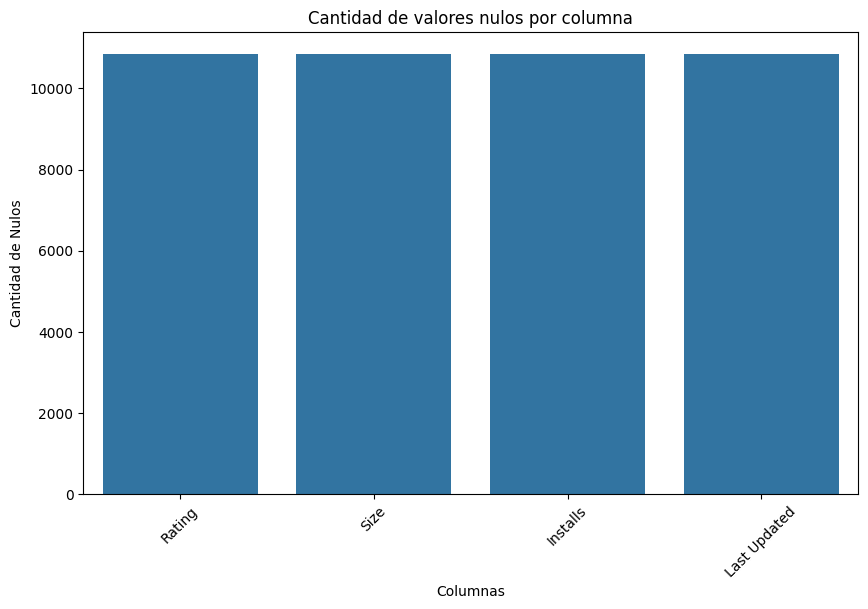

In [39]:
# Seleccionar las columnas de interés
columns_of_interest = ['Rating', 'Size', 'Installs', 'Last Updated']

# Contar los valores nulos en las columnas seleccionadas
null_counts = df_pandas[columns_of_interest].isna().sum()

# Graficar los valores nulos
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.xticks(rotation=45)
plt.show()

In [23]:
app.columns

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']